In [1]:
import pandas as pd
import matplotlib as plt

data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

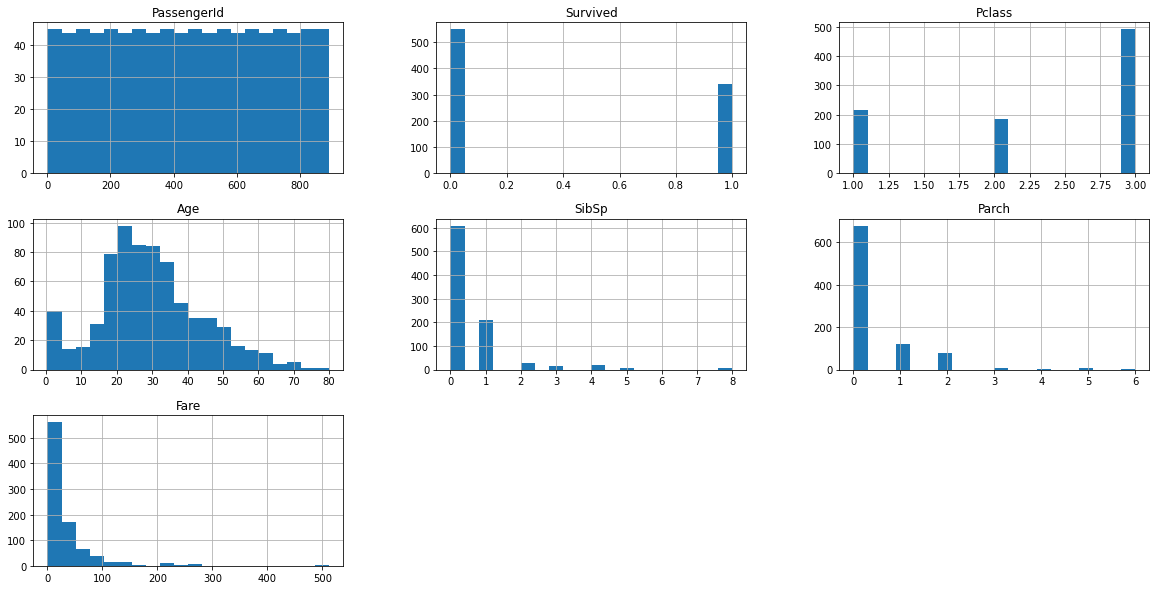

In [2]:
data.hist(bins=20, figsize=(20,10))

<AxesSubplot:>

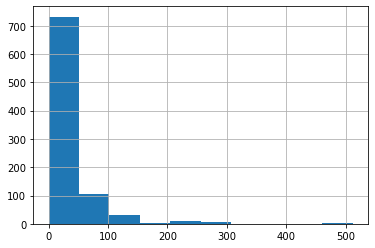

In [3]:
data["Fare"].hist()

<AxesSubplot:>

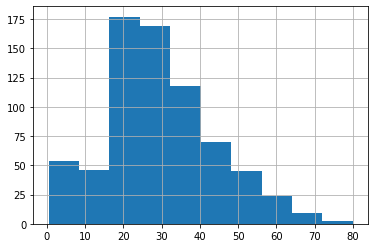

In [4]:
data["Age"].hist()

In [5]:
def clean(data):
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna("U", inplace=True)
    return data

data = clean(data)
test = clean(test)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.fit_transform(test[col])
    print(le.classes_)
    
data.head()

C:\Users\risha\miniconda3\envs\titanic\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = data["Survived"]
x= data.drop("Survived", axis=1)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)

In [10]:
predictions = clf.predict(x_val)

from sklearn.metrics import accuracy_score

accuracy_score(y_val, predictions)

0.8100558659217877

In [11]:
submission_preds = clf.predict(test)

In [12]:
df = pd.DataFrame({"PassengerId":test_ids.values, "Survived":submission_preds})

In [13]:
df.to_csv("Submission.csv", index=False)